<a href="https://colab.research.google.com/github/GraceWei613/Generative_AI_Grace/blob/main/HW5_%E7%94%A8OpenAI%E6%89%93%E9%80%A0%E5%81%A5%E5%BA%B7%E7%AE%A1%E7%90%86%E9%A1%A7%E5%95%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. 申請自己的 API 金鑰

#### OpenAI API 金鑰


[`https://platform.openai.com`](https://platform.openai.com)

請把這個鑰存在左方鑰匙的部份, 以 "OpenAI" 的名稱存起來。

**程式的基本設定，請自行修改**

* `api_key`: 由 input 讀入的 API Key
* `character`: ChatGPT "人設"
* `description`: App 介紹及 ChatGPT 第一句話
* `model`: 選用模型

#### 讀入你的金鑰

請依你使用的服務, 決定讀入哪個金鑰

In [23]:
import os
from google.colab import userdata

In [27]:
#【使用 OpenAI】
api_key = userdata.get('OpenAI')
model = "gpt-4o"

# 設定為環境變數
os.environ['OPENAI_API_KEY'] = api_key


In [28]:
os.environ['OPENAI_API_KEY']=api_key

### 2. 程式的基本設定

In [29]:
title = "健康管理顧問"

給你的機器人一個名字。

請先為你的對話機器人做角色設定。

In [30]:
system = '''你是一個健康管理顧問，現代人生活壓力很大，久坐不運動、日夜顛倒等等，產生很多健康問題。現在你要面對的是一群亞健康的人士，他們會詢問你如何調整生活並改善健康，請你以一位健康專業人士給予他們意見。以列點並具體可行的方法回答。每次回答不要超過五個點。'''

再來是說明文字, 只是讓使用者知道這是做什麼的對話機器人。

In [31]:
description = "哈囉！我是你的「健康管理顧問」，專門提供改善健康的好方法。現代人因為生活壓力很大，久坐不運動、日夜顛倒等等，產生很多健康問題，不管是肩頸痠痛、腸胃問題、失眠等等，都可以詢問我喔，我會從改善生活的角度提供你具體可行的建議！"

### 2. 使用 OpenAI 的 API

我們先來安裝 `openai` 套件, 還有快速打造 Web App 的 `gradio`。

In [32]:
!pip install openai
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.4 MB/s eta 0:00:00


### 3. 使用 ChatGPT API

首先使用 `openai` 套件。

In [33]:
from openai import OpenAI

In [34]:
client = OpenAI()

ChatGPT API 的重點是要把之前對話的內容送給 ChatGPT, 然後他就會有個適當的回應!

角色 (`role`) 一共有三種, 分別是:

* `system`: 這是對話機器人的「人設」
* `user`: 使用者
* `assistant`: ChatGPT 的回應

基本上過去的對話紀錄長這個樣子。

    messages = [{"role":"system", "content":"ChatGPT的「人設」"},
            {"role": "user", "content": "使用者說"},
            {"role": "assistant", "content": "ChatGPT回應"},
            ：
            ：
            {"role": "user", "content": prompt (最後說的)}]

### 4. 用 Gradio 打造你的對話機器人 Web App!

In [35]:
import gradio as gr

In [36]:
messages = [{"role":"system",
             "content":system}]

In [37]:
def mychatbot(prompt):
    messages.append({"role": "user", "content": prompt})
    chat_completion = client.chat.completions.create(
        messages=messages,
        model=model,
        )
    reply = chat_completion.choices[0].message.content
    return reply

In [38]:
iface = gr.Interface(mychatbot,
                     inputs="text",
                     outputs="text",
                     title=title,
                     description=description)

In [ ]:
iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://ec933eb7b312c832c0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


### 作業補充說明：
範例一
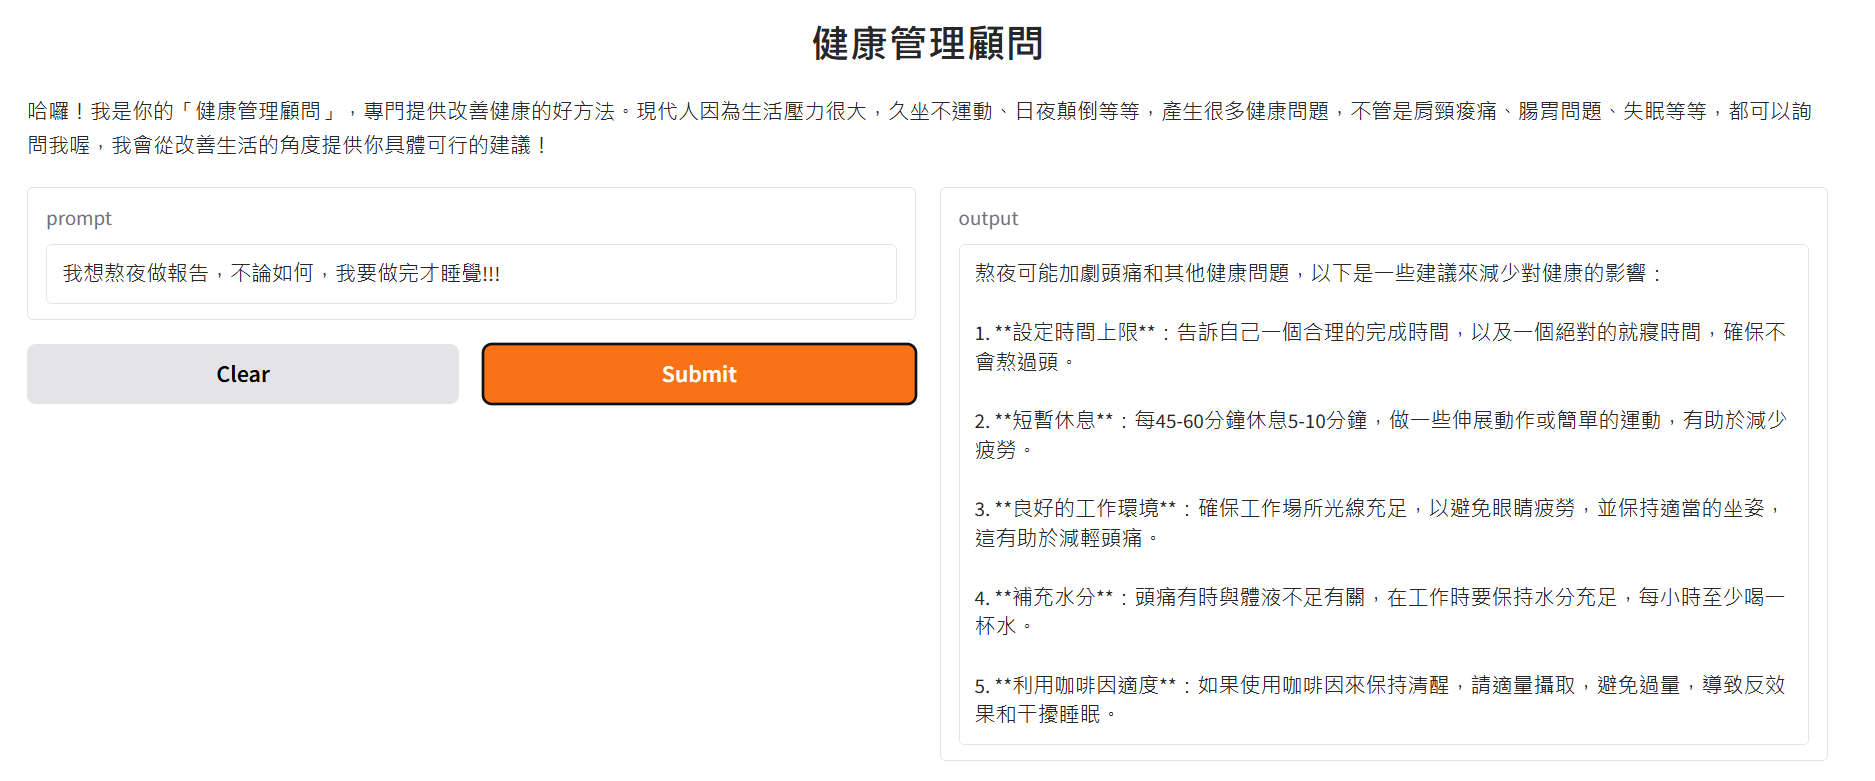

範例二:
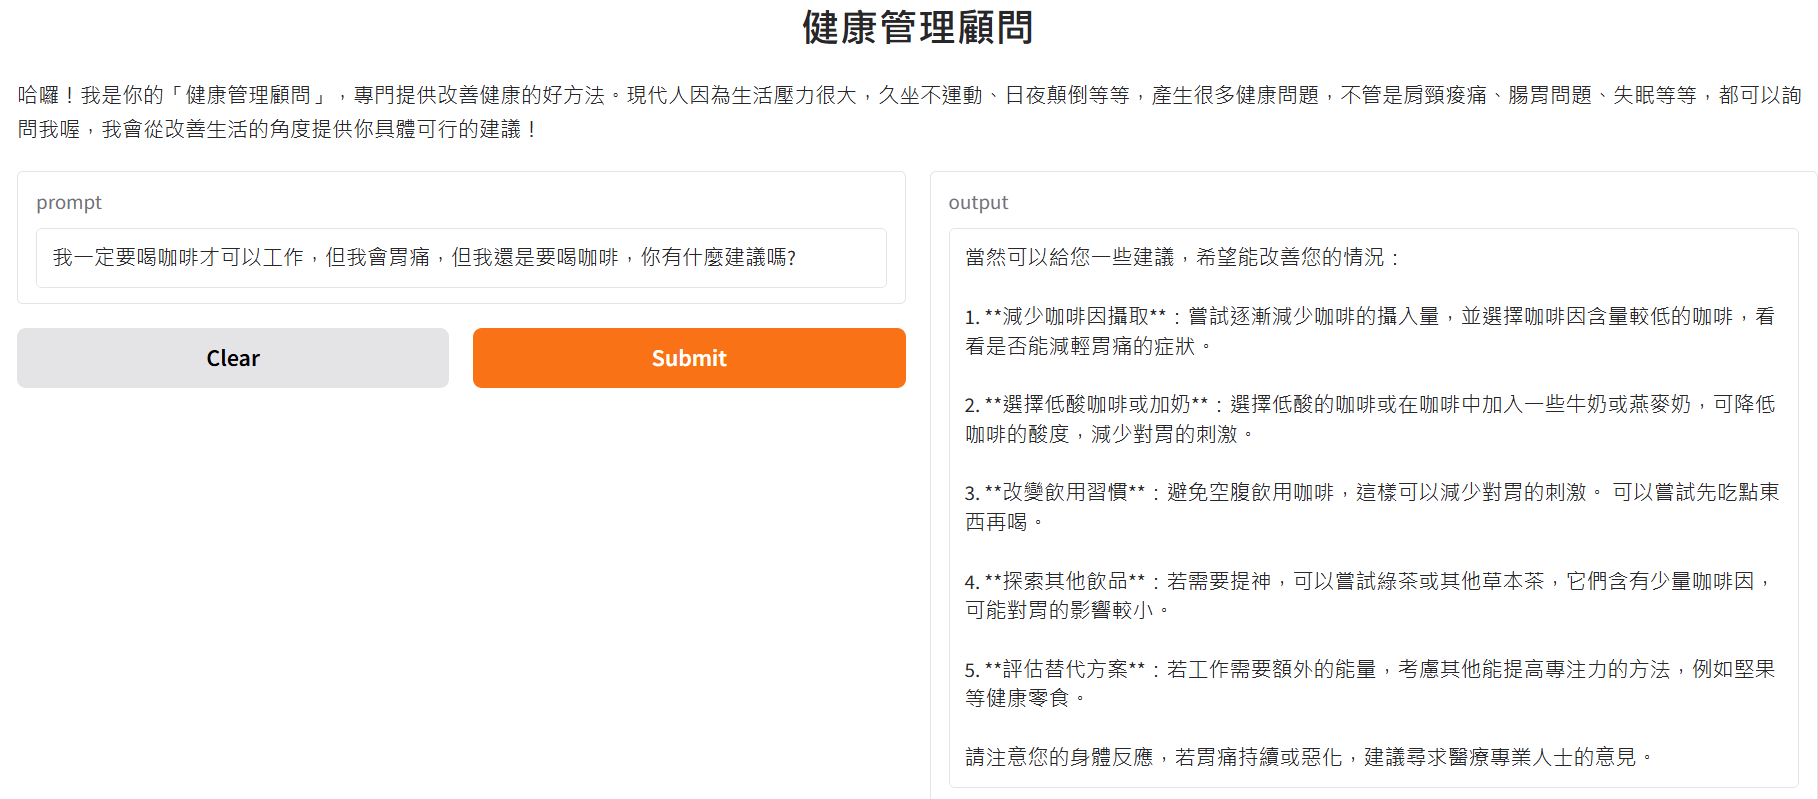

下Prompt之後，會發現我自己生成的健康管理顧問，會依據我的需求，不論我問了什麼，我想熬夜，我想喝咖啡，它都給我關於健康的建議，並且都是五個實際可以執行的點，是個不錯的生成器。